In [27]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *

from random_instances import info_dim6 as info
# from Wang_instances import info_dim6 as info

In [28]:
n = 6
instances = np.arange(1, 11)

for instance in instances:
    print(f"\n------------------")
    print(f"--- Instance {instance} ---")
    print(f"------------------")
    
    # Get and sort exact covers by increasing number of '1's
    ec = info[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1'))
    mec = ec[0]
    print("ec", ec, "mec", mec)
    L_list = [e.count("1") - 1 for e in ec]

    # Define the problem instance
    U, subsets_dict = define_instance(n, instance, verbose=False)
    gap_list = []
    k_list = [k_from_L(n, instance, L) for L in L_list] + [1]

    for i,k in enumerate(k_list):
        if i < len(k_list)-1:
            
            if L_list[i] == mec.count("1") - 1:
                print(f"\n{i}) L = L_MEC - 1 <-> k = {k}")
            else:
                print(f"\n{i}) L = {L_list[i]} <-> k = {k}")


        else:
            print(f"\n{i}) k = {k}")

        
            
        # Compute the feasible spectrum
        _, _, states_feas, energies_feas, _ = find_spectrum(U, subsets_dict, n, k)
        # show_spectrum(n, instance, k, fontsize=13, verbose=False)

        # Print energies of MEC and exact covers
        # print("  Energies of MEC and exact covers:")
        for e in ec:
            energy = compute_energy_Wang(e, U, subsets_dict, k)
            # print(f"  Energy({e}) = {energy}")

        # Sort states and energies
        sorted_pairs = sorted(zip(energies_feas, states_feas))
        energies_feas_sorted = [energy for energy, _ in sorted_pairs]
        states_feas_sorted = [state for _, state in sorted_pairs]

        # Check if ground state (GS) is the MEC
        if states_feas_sorted[0] != mec:
            print("      ### THE GS IS NOT THE MEC !!! ###")
        # print(f"  GS: Energy({states_feas_sorted[0]}) = {energies_feas_sorted[0]}\n")

        # If there are other exact covers, Check if the 1st excited is an exact cover.
        if len(ec) > 1:
            if not(states_feas_sorted[1] != mec and states_feas_sorted[1] in ec):
                print("      ### THE 1st excited IS NOT AN EXACT COVER ###")
            # print(f"  1st excited: Energy({states_feas_sorted[1]}) = {energies_feas_sorted[1]}\n")

        # Compute energy gap
        gap_gs_excited = abs(energies_feas_sorted[0]) - abs(energies_feas_sorted[1])
        # print(f"\n  The gap GS-1st_excited is {gap_gs_excited}.")

        total_energy = abs(min(energies_feas) - max(energies_feas))
        gap = gap_gs_excited / total_energy * 100
        # print("  gap GS-1st_excited / total energy [%]:", gap)

        gap_list.append(gap)

    gap_list = [str(round(g,2))+'%' for g in gap_list]
    # k_list = [round(k,3) for k in k_list]
    print("\ngap_list", gap_list)
    print("k_list", k_list)
    print("L_list", L_list)


------------------
--- Instance 1 ---
------------------
ec ['010001', '101110'] mec 010001

0) L = L_MEC - 1 <-> k = 0.05555555555555555
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st excited IS NOT AN EXACT COVER ###

1) L = 3 <-> k = 0.16666666666666666
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st excited IS NOT AN EXACT COVER ###

2) k = 1
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st excited IS NOT AN EXACT COVER ###

gap_list ['0.0%', '22.22%', '24.64%']
k_list [0.05555555555555555, 0.16666666666666666, 1]
L_list [1, 3]

------------------
--- Instance 2 ---
------------------
ec ['001101', '111011'] mec 001101

0) L = L_MEC - 1 <-> k = 0.16666666666666666
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st excited IS NOT AN EXACT COVER ###

1) L = 4 <-> k = 0.3333333333333333
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st excited IS NOT AN EXACT COVER ###

2) k = 1
      ### THE GS IS NOT THE MEC !!! ###
      ### THE 1st exc

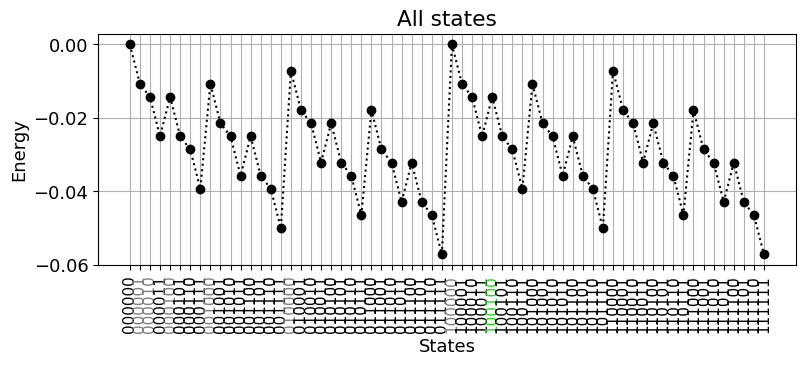

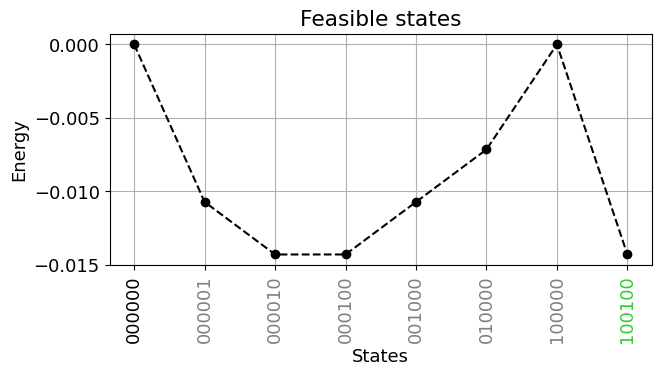

In [21]:
show_spectrum(n, instance=10, k=0.041666666666666664, fontsize=13, verbose=False)